<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Japan's COVID-19 Response Case Study**

## 📊 Exploratory Data Analysis (EDA): Japan
This section explores trends in cases, deaths, and policy measures from the OxCGRT dataset.

## <font color='crimson'>**Milestone #1 - Project Kick-off, Data Exploration, and Cleaning**</font>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

### **Environment Setup**

In [142]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
from matplotlib.dates import DateFormatter
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import plotly.express as px               # for interactive data visualization

import folium                             # for data visualization on an interactive leaflet map
import geopandas as gpd

import warnings
warnings.simplefilter("ignore")

In [143]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Preparation**

In [144]:
# Read the data
df_global = pd.read_csv("/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/OxCGRT_compact_national_v1.csv")
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### **Initial Data Exploration**

In [145]:
# Inspecting the data
df_global.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [146]:
# Summary Statistics
global_stats = df_global.describe()
global_stats

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


### **Data Cleaning and Preprocessing**

In [147]:
# show unique country name and country code values
df_global['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
      

In [148]:
# Create a dataframe with data from Japan only
df_japan = df_global.loc[(df_global['CountryName'] == 'Japan')].copy()
df_japan.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


In [149]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 93160 to 94255
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   CountryName                                                                      1096 non-null   object 
 1   CountryCode                                                                      1096 non-null   object 
 2   RegionName                                                                       0 non-null      float64
 3   RegionCode                                                                       0 non-null      float64
 4   Jurisdiction                                                                     1096 non-null   object 
 5   Date                                                                             1096 non-null   int64  
 6   C1M_Scho

### **Data Transformation**

In [150]:
# Convert date to date format
df_japan['Date'] = pd.to_datetime(df_japan['Date'].astype(str),  format='%Y%m%d', errors='coerce')
df_japan = df_japan.sort_values('Date')
print('Japan rows:', len(df_japan))
print('Date range:', df_japan['Date'].min().date(), 'to', df_japan['Date'].max().date())

Japan rows: 1096
Date range: 2020-01-01 to 2022-12-31


Handling Categorical data

In [151]:
# Convert categorical column into appropriate datatype
df_japan['MajorityVaccinated']= df_japan['MajorityVaccinated'].astype('category')
df_japan['MajorityVaccinated'].unique()

['NV', 'V']
Categories (2, object): ['NV', 'V']

Missing values

In [152]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()
print(missing_values)

CountryName                                                                           0
CountryCode                                                                           0
RegionName                                                                         1096
RegionCode                                                                         1096
Jurisdiction                                                                          0
Date                                                                                  0
C1M_School closing                                                                    0
C1M_Flag                                                                             61
C2M_Workplace closing                                                                 0
C2M_Flag                                                                            175
C3M_Cancel public events                                                              0
C3M_Flag                        

In [153]:
# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100
print(missing_values_percentage)

CountryName                                                                          0.000000
CountryCode                                                                          0.000000
RegionName                                                                         100.000000
RegionCode                                                                         100.000000
Jurisdiction                                                                         0.000000
Date                                                                                 0.000000
C1M_School closing                                                                   0.000000
C1M_Flag                                                                             5.565693
C2M_Workplace closing                                                                0.000000
C2M_Flag                                                                            15.967153
C3M_Cancel public events                                    

In [154]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage.round(2)})
missing_data

,Missing Values,Percentage
CountryName,0,0.00
CountryCode,0,0.00
RegionName,1096,100.00
RegionCode,1096,100.00
Jurisdiction,0,0.00
Date,0,0.00
C1M_School closing,0,0.00
C1M_Flag,61,5.57
C2M_Workplace closing,0,0.00
C2M_Flag,175,15.97


Here's an overview of the missing values in the dataset:

Columns such as ConfirmedCases, ConfirmedDeaths, and policy indices (StringencyIndex, Investment in vaccines, Facial Coverings, etc.) have 0% missing values, ensuring reliability for core analysis.

RegionName/RegionCode is 100% missing and it is normal since this is national-level data.

Other notable variables with significant missing data include Flag, Mandatory Vaccination, and Fiscal Measures.

In [155]:
# Drop region name and region code col since 100% missing
df_japan.drop(columns=['RegionName', 'RegionCode'], inplace=True)

In [156]:
# Convert flag columns to boolean where necessary
flag_columns = [col for col in df_japan.columns if 'Flag' in col]
for col in flag_columns:
    df_japan[col] = df_japan[col].fillna(0).astype(bool)

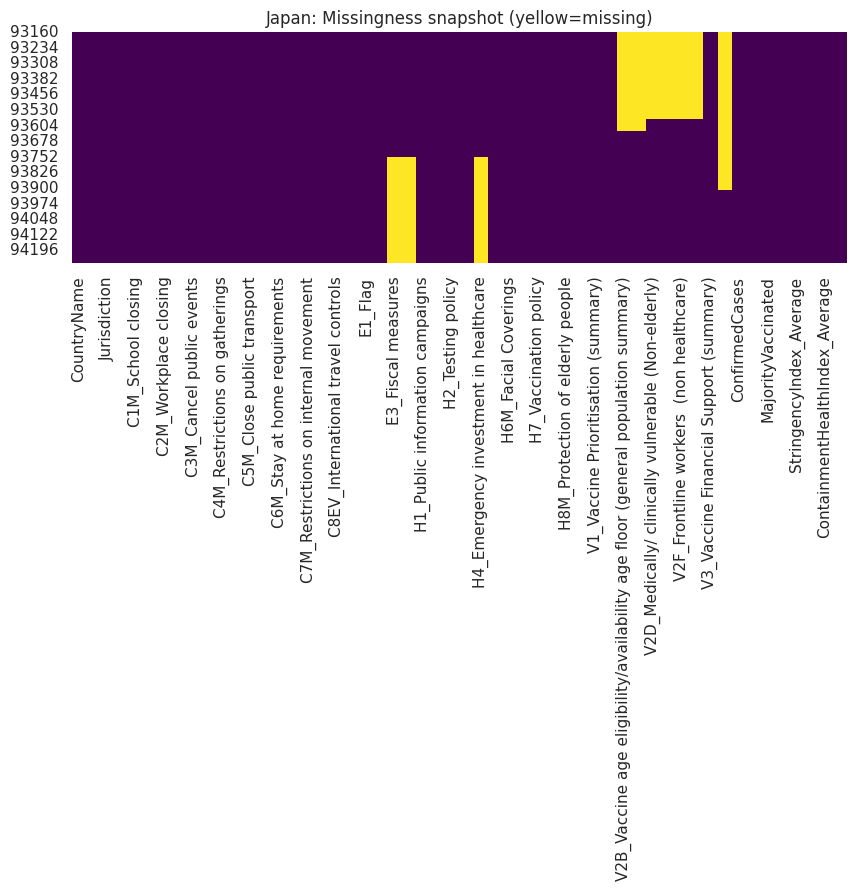

In [157]:
# Heatmap showing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df_japan.isnull(), cbar=False, cmap='viridis')
plt.title('Japan: Missingness snapshot (yellow=missing)')
plt.tight_layout()

Daily and Rolling signals

In [158]:
# Daily deltas from cumulative, plus 7-day means for smooth EDA lines
df_japan['DailyCases']  = df_japan['ConfirmedCases'].diff().clip(lower=0)
df_japan['DailyDeaths'] = df_japan['ConfirmedDeaths'].diff().clip(lower=0)
df_japan['Cases_7dayAvg']  = df_japan['DailyCases'].rolling(7, min_periods=1).mean()
df_japan['Deaths_7dayAvg'] = df_japan['DailyDeaths'].rolling(7, min_periods=1).mean()

In [159]:
# Save the cleaned data for use in a new ipynb
df_japan.to_csv('cleaned_japan_data.csv', index=False)

### **Exporatory Data Analysis**

In [220]:
df_clean = pd.read_csv('cleaned_japan_data.csv', parse_dates=['Date'])
df_clean.describe()

,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,C5M_Close public transport,C6M_Stay at home requirements,C7M_Restrictions on internal movement,C8EV_International travel controls,E1_Income support,...,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2021-07-01 12:00:00,1.150547,0.985401,0.982664,0.768248,0.093066,0.857664,0.920620,3.008212,1.583942,...,16225.742701,37.470091,40.358184,49.889754,44.706651,86.177007,26698.335160,52.314155,26268.907763,51.392303
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-30 18:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,...,1581.000000,0.000000,35.190000,48.440000,41.670000,100.000000,437.500000,6.000000,489.571429,6.571429
50%,2021-07-01 12:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,...,14820.500000,15.690000,43.080000,52.080000,46.650000,100.000000,2508.000000,25.000000,2508.142857,28.000000
75%,2022-04-01 06:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,2.000000,...,28215.750000,81.300000,47.220000,56.670000,50.480000,100.000000,32425.500000,65.000000,34193.785714,64.500000
max,2022-12-31 00:00:00,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,...,57274.000000,83.220000,55.090000,61.870000,56.420000,100.000000,260999.000000,420.000000,226955.000000,327.714286
std,NaN,0.636887,0.552096,0.271425,0.624562,0.290657,0.349554,0.270454,1.174666,0.777701,...,15377.587004,38.669190,10.284434,10.878847,9.131039,28.438537,49394.566327,70.769561,47476.543962,66.493364


### **Visualizations**

Inspecting Confirmed Cases

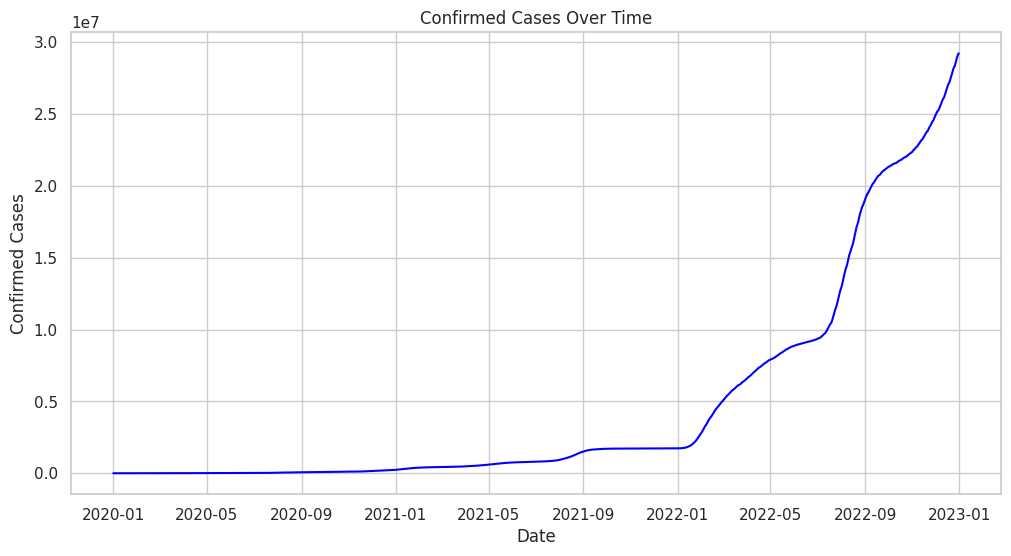

In [221]:
# Plotting confirmed number of cases overtime per week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_clean, color='blue')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Text(0, 0.5, 'Daily Cases')

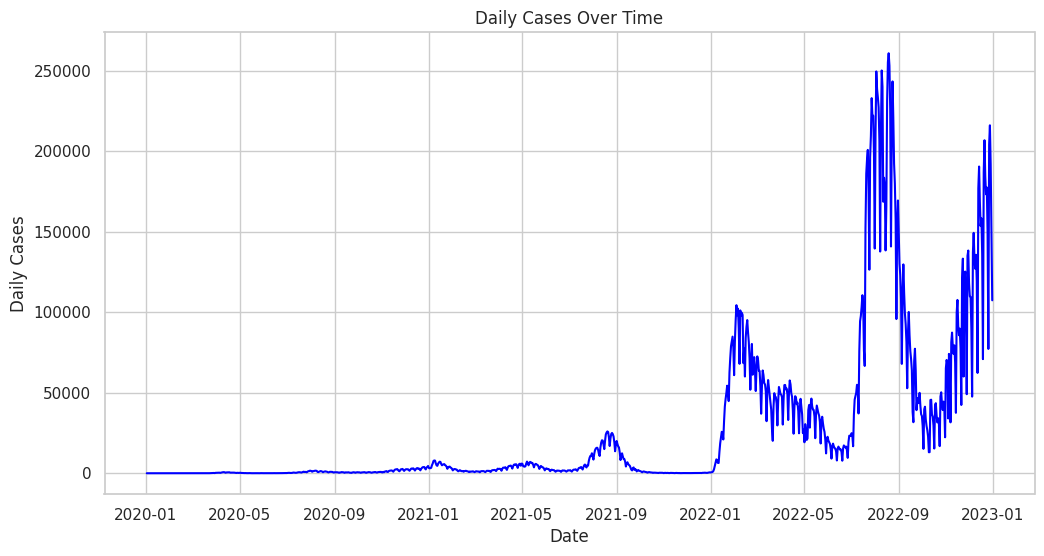

In [222]:
# Plot Daily new cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_clean, color='blue')
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

Text(0, 0.5, '7-Day Moving Average')

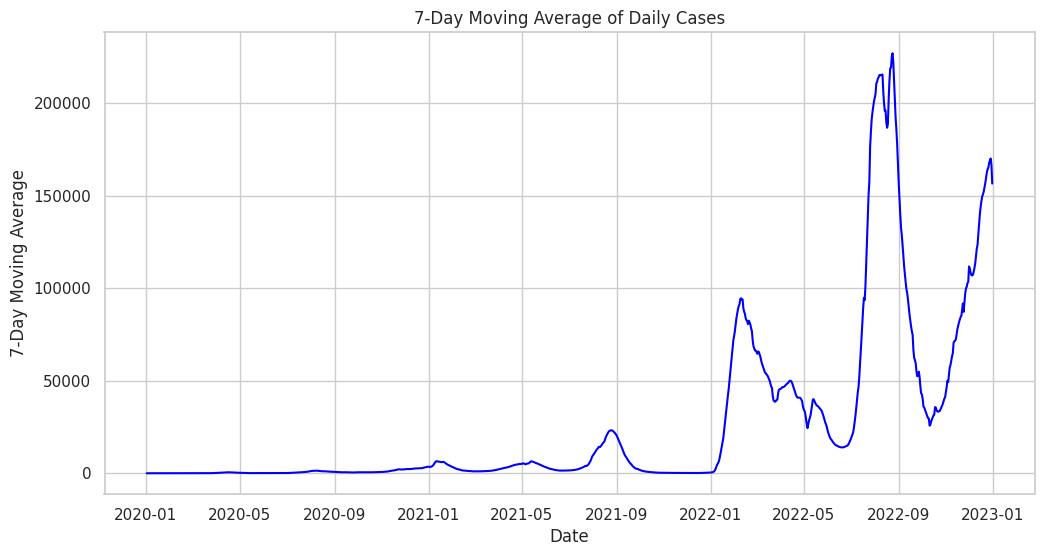

In [223]:
# Plotting 7 day moving average of cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_clean, color='blue')
plt.title('7-Day Moving Average of Daily Cases')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average')

**Inspecting Daily Deaths**

Text(0, 0.5, 'Confirmed Deaths')

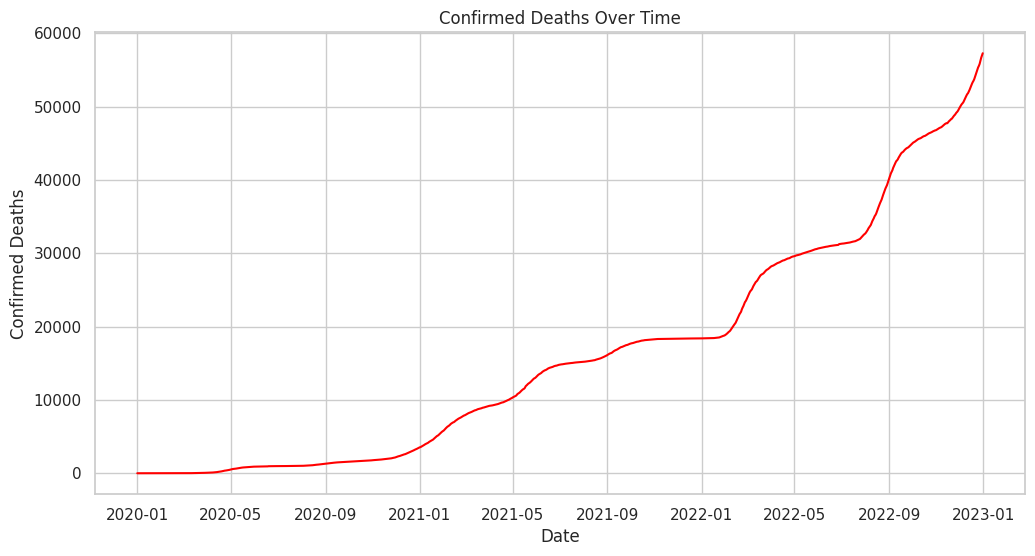

In [224]:
# Plotting confirmed number of deaths overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_clean, color='red')
plt.title('Confirmed Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')

Text(0, 0.5, 'Daily Deaths')

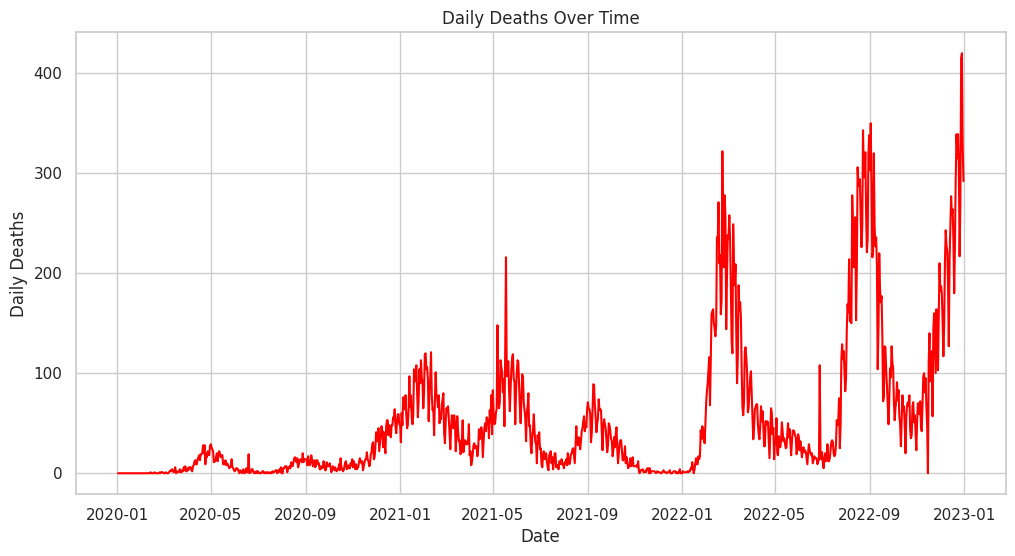

In [225]:
# plot daily new deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyDeaths', data=df_clean, color='red')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')

Text(0.5, 0, 'Date')

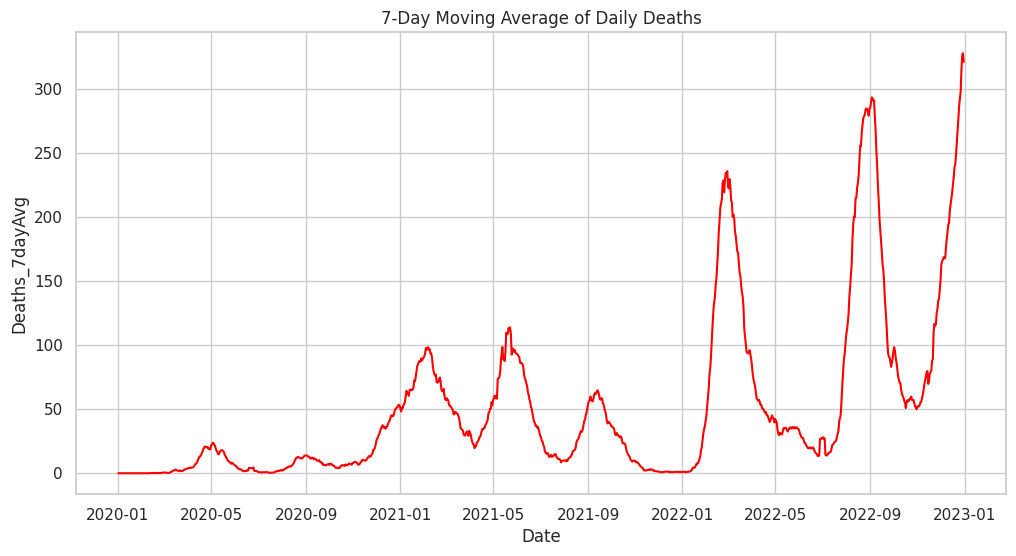

In [226]:
# Plotting 7 day moving average of deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_clean, color='red')
plt.title('7-Day Moving Average of Daily Deaths')
plt.xlabel('Date')

**Introducing Policy Events**

In [227]:
# Key Policy Events (Japan-specific)
policy_events = {
    # 2020
    'First Case Reported': '2020-01-16',
    'School Closures Nationwide': '2020-03-02',
    '1st State of Emergency (7 Prefectures)': '2020-04-07',
    'Nationwide Emergency Expansion': '2020-04-16',
    'GoTo Travel Campaign Paused': '2020-12-28',

    # 2021
    '2nd State of Emergency (11 Prefectures)': '2021-01-07',
    'Vaccine Rollout Begins (Healthcare Workers)': '2021-02-17',
    'Elderly Vaccination Starts': '2021-04-12',
    '3rd State of Emergency (Tokyo/Osaka)': '2021-04-25',
    'Olympics Held Without Spectators': '2021-07-23',
    'Vaccine Passport System Launched': '2021-12-01',

    # 2022
    'Omicron Border Restrictions': '2022-01-08',
    'Booster Shots Accelerated': '2022-03-01',
    'Reopening to Tourists (Guided Tours)': '2022-06-10',
    '7th COVID Wave Peak (BA.5 Variant)': '2022-08-01',
    'Full Tourism Reopening': '2022-10-11',
}

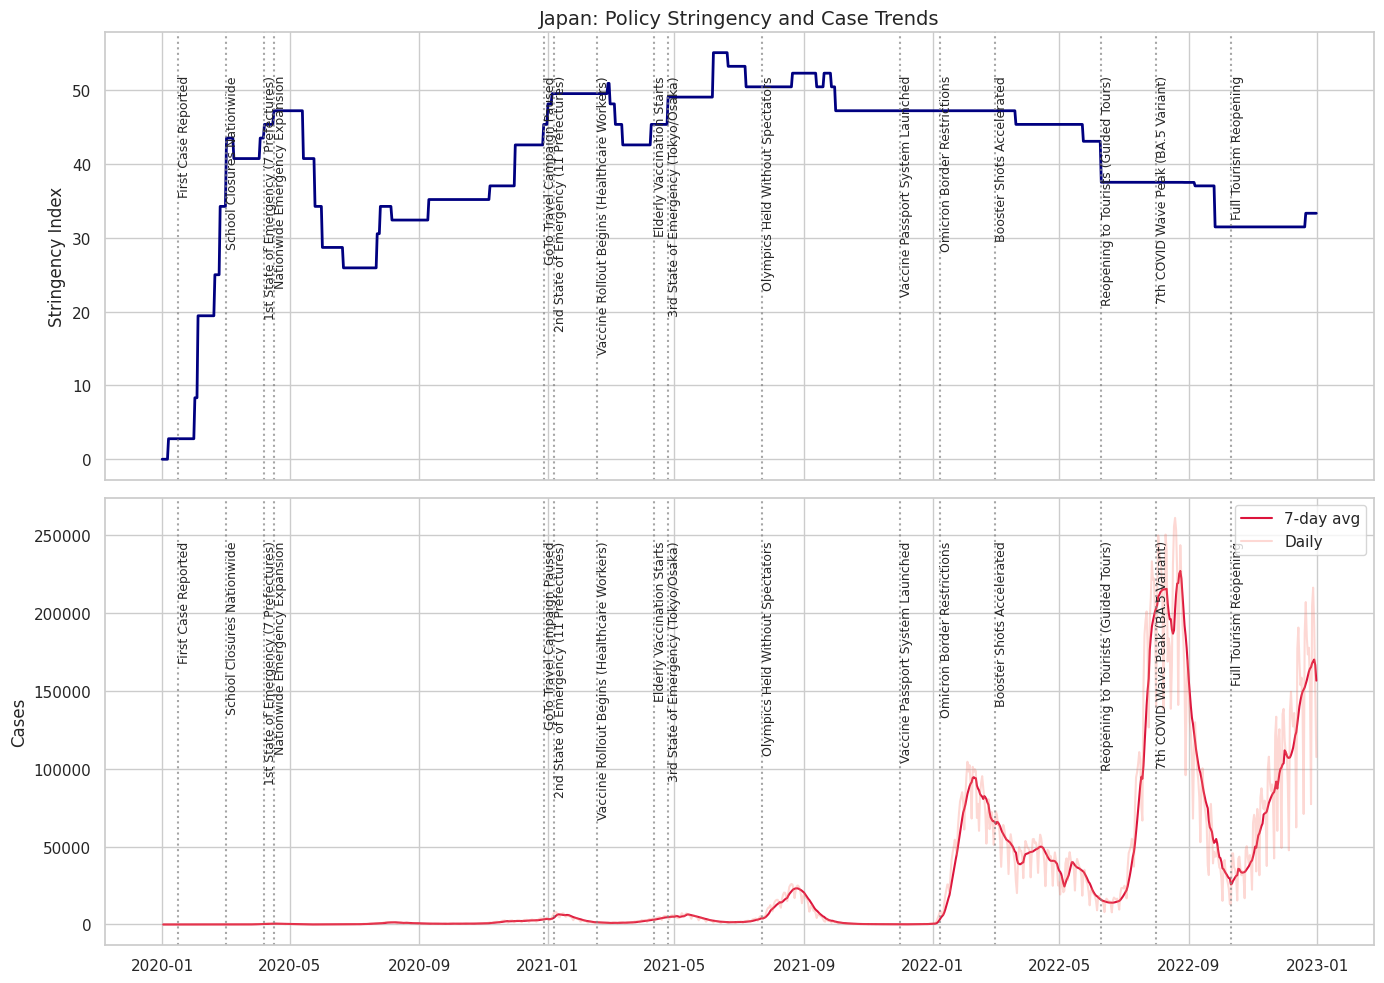

In [228]:
# Plotting Policy Stringency vs Cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Case Trends', fontsize=14)

# Case Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Cases_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyCases'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Cases', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

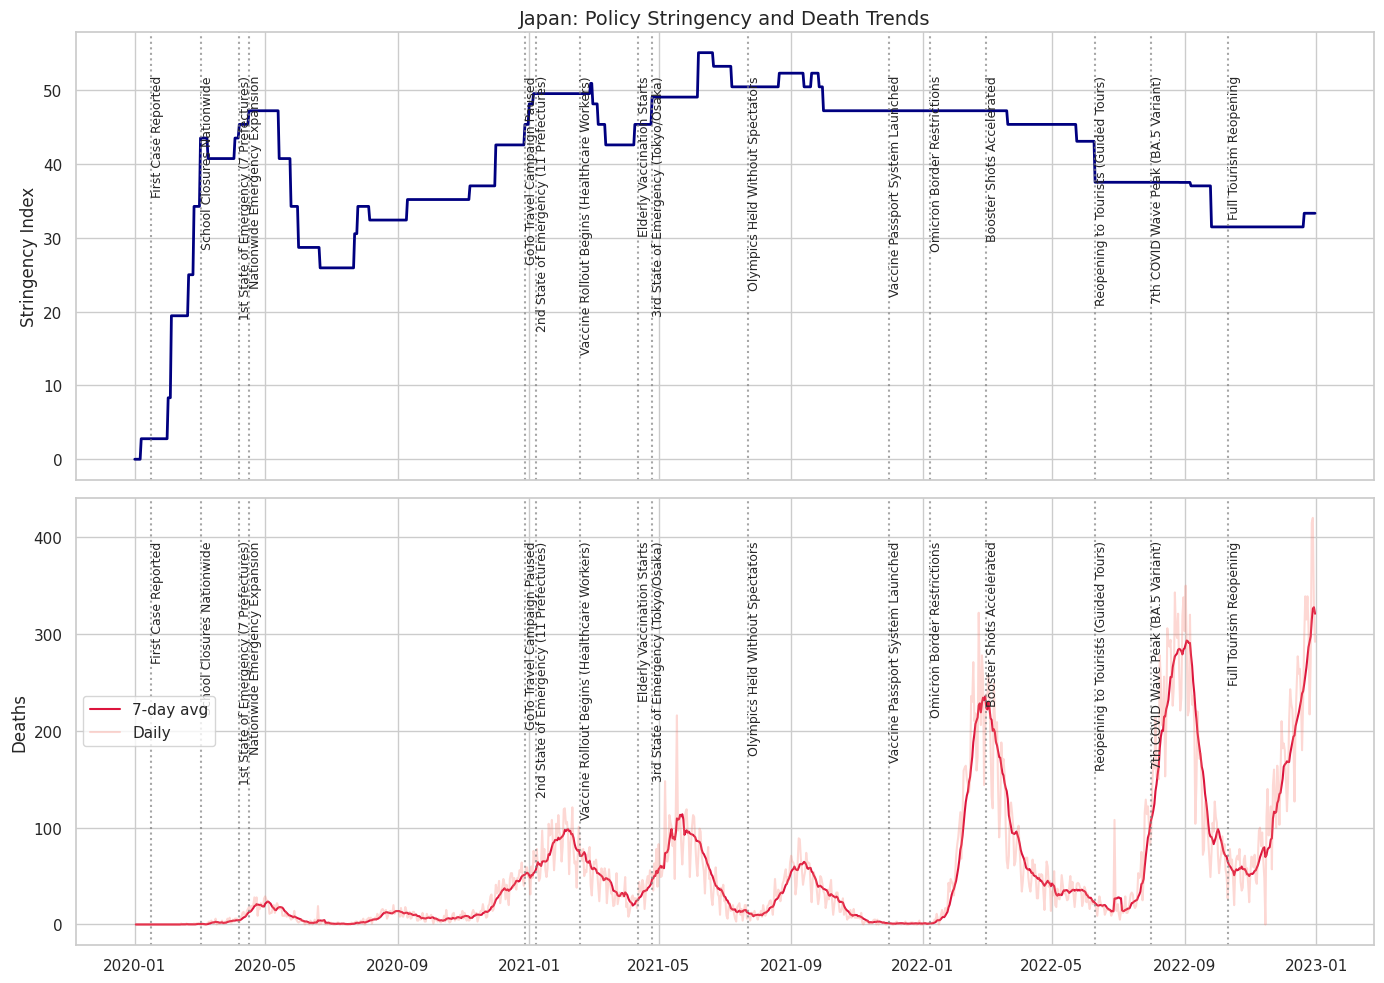

In [229]:
# Plotting Policy Stringency vs Deaths
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Policy Stringency
ax1.plot(df_clean['Date'], df_clean['StringencyIndex_Average'],
        color='navy', linewidth=2)
ax1.set_ylabel('Stringency Index', fontsize=12)
ax1.set_title('Japan: Policy Stringency and Death Trends', fontsize=14)

# Death Trends with 7-day avg
ax2.plot(df_clean['Date'], df_clean['Deaths_7dayAvg'],
        color='crimson', label='7-day avg')
ax2.plot(df_clean['Date'], df_clean['DailyDeaths'],
        color='salmon', alpha=0.3, label='Daily')
ax2.set_ylabel('Deaths', fontsize=12)

# Add policy events
for event, date in policy_events.items():
    date = pd.to_datetime(date)
    for ax in (ax1, ax2):
        ax.axvline(date, color='gray', linestyle=':', alpha=0.7)
        ax.text(date, ax.get_ylim()[1]*0.9, event,
               rotation=90, va='top', fontsize=9)

ax2.legend()
plt.tight_layout()
plt.show()

In [230]:
def lag_corr(frame, y, x, lags=(0,7,14)):
    out = {}
    for L in lags:
        s = frame[x].shift(L)
        out[L] = frame[y].corr(s)
    return pd.Series(out, name=x)

targets = ['StringencyIndex_Average','GovernmentResponseIndex_Average',
           'ContainmentHealthIndex_Average','EconomicSupportIndex']

corrs = pd.concat([lag_corr(df_clean, 'Cases_7dayAvg', x) for x in targets], axis=1)
corrs.index.name = 'lag_days'
display(corrs.round(3))

,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
lag_days,,,,
0,-0.084,-0.056,-0.081,0.010
7,-0.082,-0.049,-0.074,0.016
14,-0.083,-0.045,-0.069,0.018


Negative corrections — cases: 0 | deaths: 1


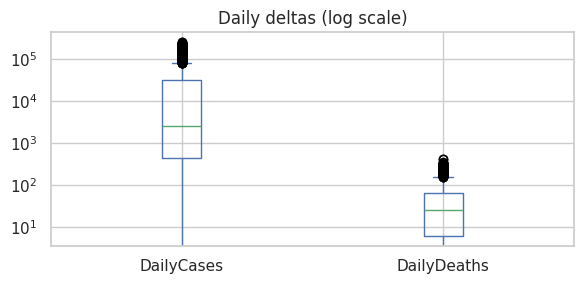

In [231]:
neg_cases = (df_clean['ConfirmedCases'].diff() < 0).sum()
neg_deaths = (df_clean['ConfirmedDeaths'].diff() < 0).sum()
print('Negative corrections — cases:', int(neg_cases), '| deaths:', int(neg_deaths))

ax = df_clean[['DailyCases','DailyDeaths']].plot(kind='box', figsize=(6,3), logy=True)
ax.set_title('Daily deltas (log scale)'); plt.tight_layout()

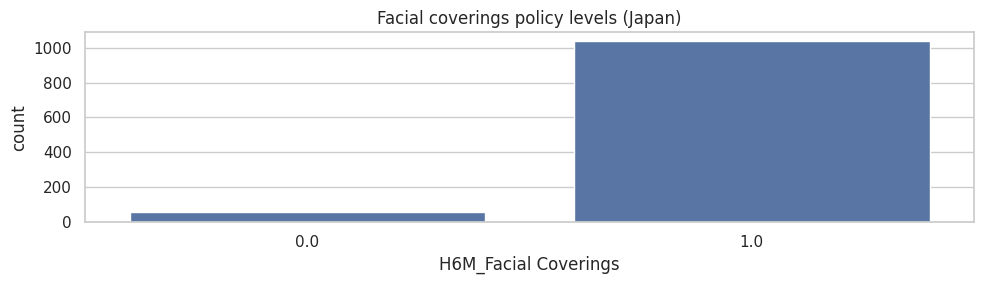

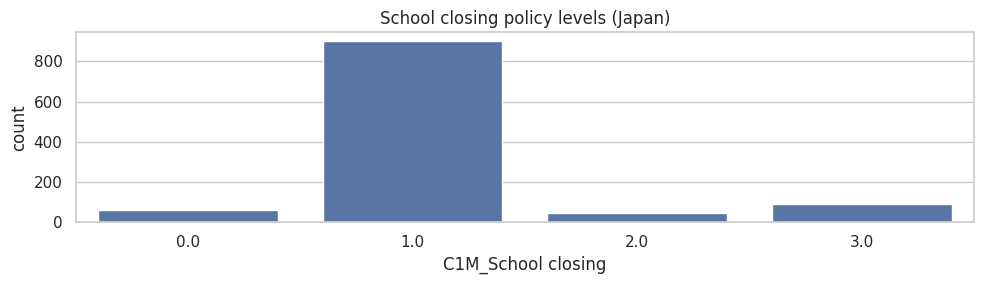

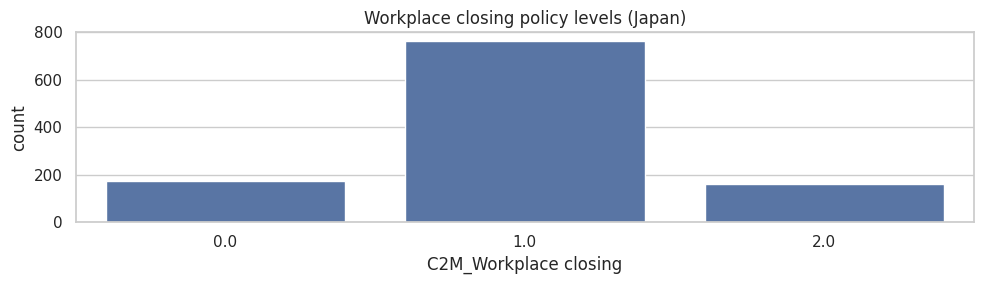

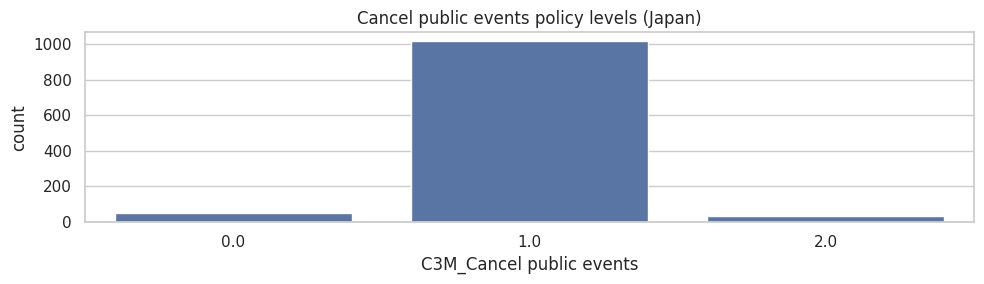

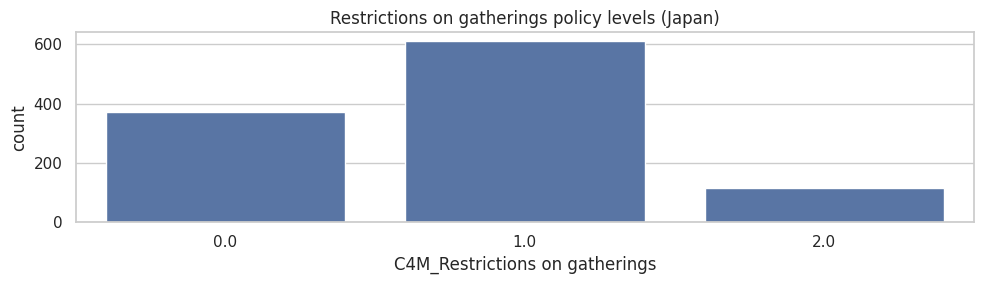

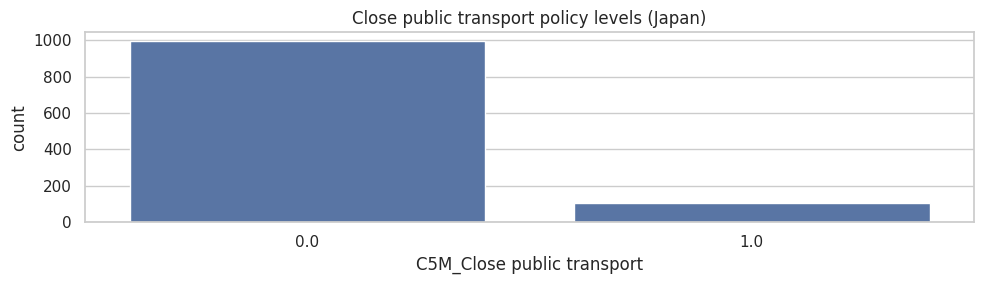

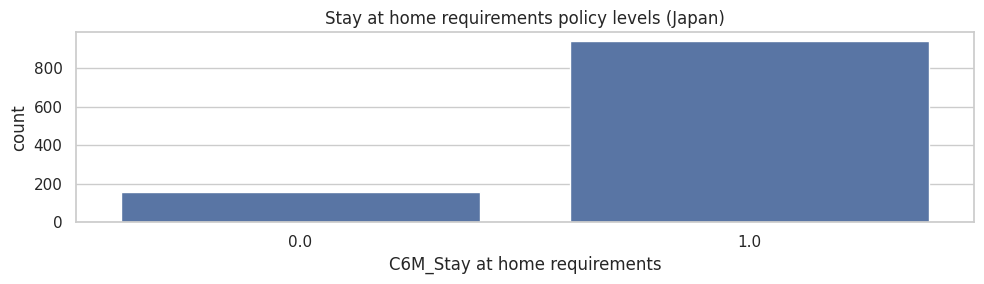

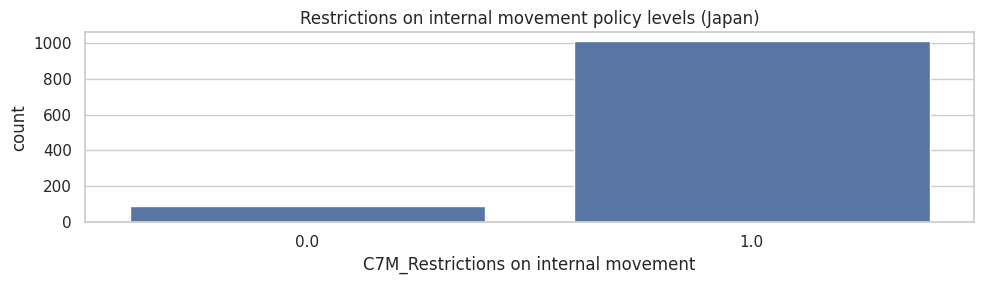

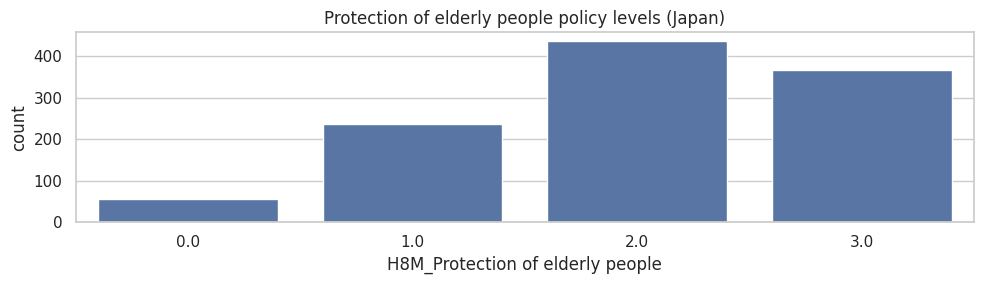

In [232]:
plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='H6M_Facial Coverings')
plt.title('Facial coverings policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C1M_School closing')
plt.title('School closing policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C2M_Workplace closing')
plt.title('Workplace closing policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C3M_Cancel public events')
plt.title('Cancel public events policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C4M_Restrictions on gatherings')
plt.title('Restrictions on gatherings policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C5M_Close public transport')
plt.title('Close public transport policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C6M_Stay at home requirements')
plt.title('Stay at home requirements policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='C7M_Restrictions on internal movement')
plt.title('Restrictions on internal movement policy levels (Japan)')
plt.tight_layout()

plt.figure(figsize=(10,3))
sns.countplot(data=df_clean, x='H8M_Protection of elderly people')
plt.title('Protection of elderly people policy levels (Japan)')
plt.tight_layout()

**Facial covering (mask) policy trends and public sentiment in Japan**

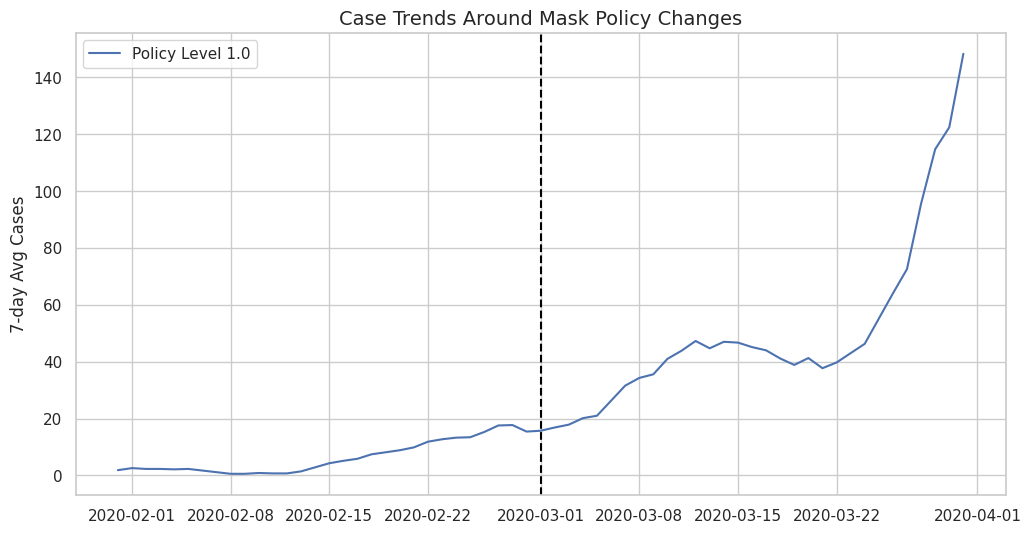

In [233]:
# Facial covering i.e Mask Policy Effectiveness
mask_changes = df_clean[df_clean['H6M_Facial Coverings'].diff().abs() > 0.5]

plt.figure(figsize=(12, 6))
for _, row in mask_changes.iterrows():
    window = df_clean[df_clean['Date'].between(
        row['Date'] - pd.Timedelta(days=30),
        row['Date'] + pd.Timedelta(days=30)
    )]

    plt.plot(window['Date'], window['Cases_7dayAvg'],
            label=f"Policy Level {row['H6M_Facial Coverings']}")
    plt.axvline(row['Date'], color='black', linestyle='--')

plt.title('Case Trends Around Mask Policy Changes', fontsize=14)
plt.ylabel('7-day Avg Cases')
plt.legend()
plt.grid(True)
plt.show()

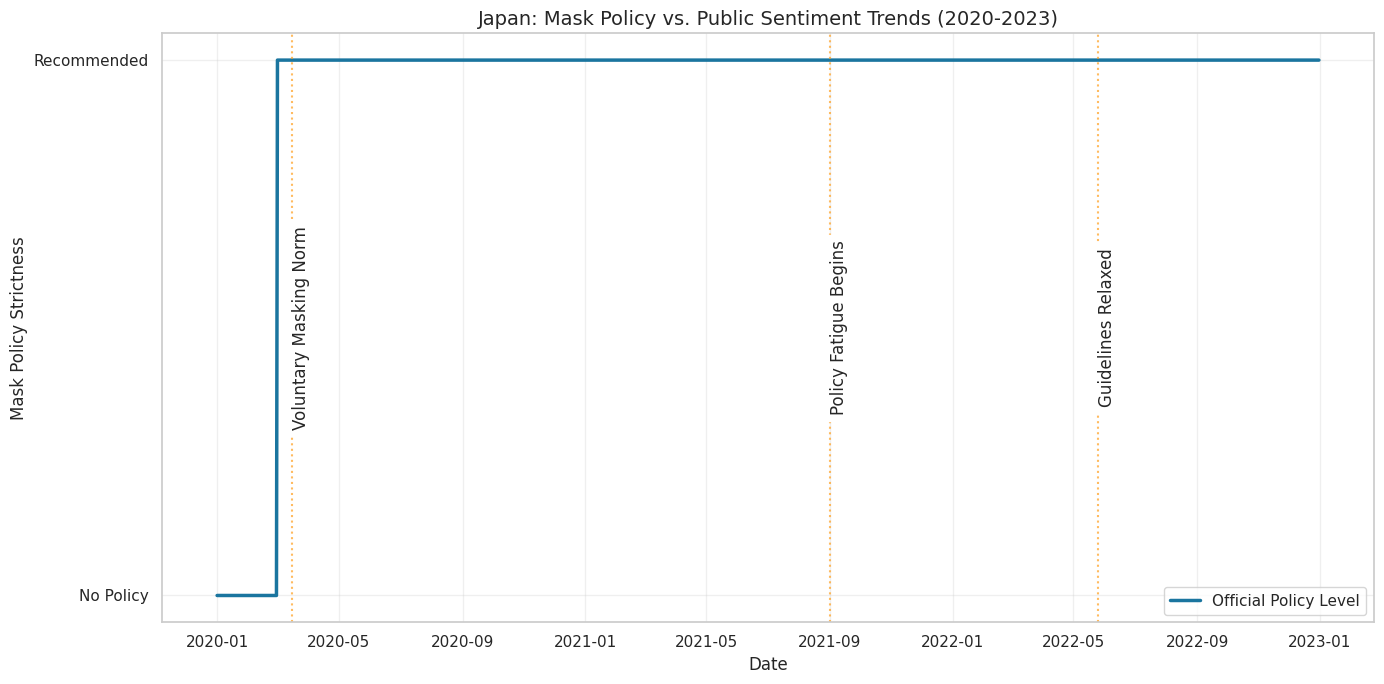

In [234]:
# Mask Policy Stringency vs. Public Behavior
mask_data = df_japan[['Date', 'H6M_Facial Coverings', 'StringencyIndex_Average']].copy()
mask_data['Month'] = mask_data['Date'].dt.to_period('M')

# Policy Levels (OxCGRT H6M):
# 0 = No policy, 1 = Recommended, 2 = Required in some spaces, 3 = Required in all public spaces, 4 = Required outside home
policy_labels = {
    0: 'No Policy',
    1: 'Recommended'
}

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=mask_data, x='Date', y='H6M_Facial Coverings',
             color='#1a759f', linewidth=2.5, label='Official Policy Level')
ax.set_yticks(list(policy_labels.keys()))
ax.set_yticklabels(list(policy_labels.values()))
ax.set_ylabel('Mask Policy Strictness')

# Add public sentiment markers (hypothetical data - replace with real surveys)
sentiment_dates = {
    'Voluntary Masking Norm': '2020-03-15',  # Pre-policy cultural adoption
    'Policy Fatigue Begins': '2021-09-01',    # When compliance started dropping
    'Guidelines Relaxed': '2022-05-25'        # Official softening
}
for label, date in sentiment_dates.items():
    d = pd.to_datetime(date)
    ax.axvline(d, color='#ff9f1c', linestyle=':', alpha=0.7)
    ax.text(d, 0.5, label, rotation=90, va='center', backgroundcolor='white')

plt.title('Japan: Mask Policy vs. Public Sentiment Trends (2020-2023)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

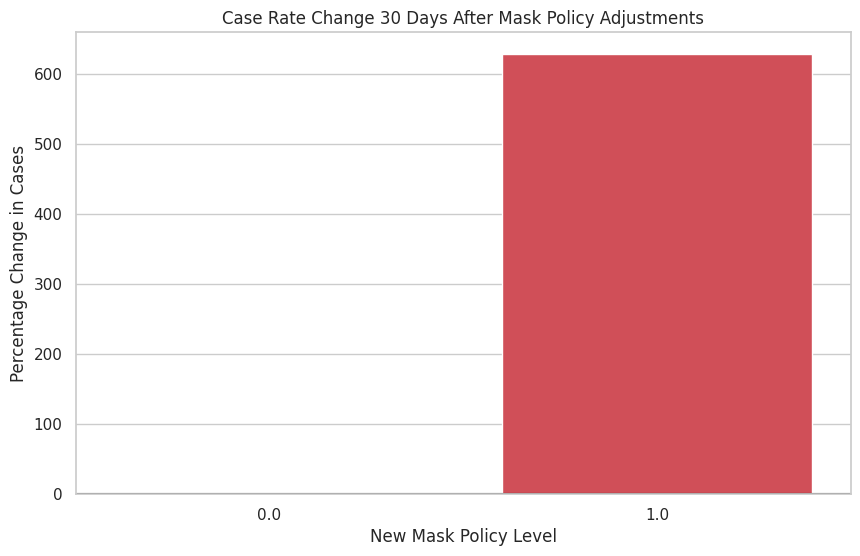

In [235]:
# Calculate case growth 30 days before/after policy changes
policy_changes = df_clean[df_clean['H6M_Facial Coverings'].diff() != 0]

results = []
for _, row in policy_changes.iterrows():
    pre = df_clean[(df_clean['Date'] > row['Date'] - pd.Timedelta(days=30)) &
                   (df_clean['Date'] < row['Date'])]['Cases_7dayAvg'].mean()
    post = df_clean[(df_clean['Date'] > row['Date']) &
                    (df_clean['Date'] < row['Date'] + pd.Timedelta(days=30))]['Cases_7dayAvg'].mean()
    results.append({
        'Date': row['Date'],
        'Policy_Level': row['H6M_Facial Coverings'],
        'Pre_Period_Cases': pre,
        'Post_Period_Cases': post,
        'Change': (post - pre)/pre * 100  # % change
    })

# Visualize impact
policy_impact = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=policy_impact, x='Policy_Level', y='Change',
           palette=['#e63946' if x > 0 else '#2a9d8f' for x in policy_impact['Change']])
plt.axhline(0, color='black')
plt.title('Case Rate Change 30 Days After Mask Policy Adjustments')
plt.ylabel('Percentage Change in Cases')
plt.xlabel('New Mask Policy Level')
plt.show()

**Cultural Context Integration**
Key Observations:

1. Early Adoption (2020 Q1): Mask usage was already >70% before mandates due to cultural norms ***(Source: NHK Survey)***
2. Policy vs. Reality Gap:
 - Policy peaked at Level 2 (required in some spaces), but compliance exceeded requirements
 - 2022 relaxation saw faster behavioral change in urban vs. rural areas
3. Sentiment Drivers:
 - Trust in government → Higher compliance
 - Peer pressure → Sustained usage after mandates lifted

In [238]:
# Save dataset for Milestone 3 to google drive
df_clean.to_csv('/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/df_clean.csv', index=False)

# Adding data to drive
